# Programming Exercise 6: Support Vector Machines

In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. 

## 1. Support Vector Machines

In the first half o fthis exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an inutition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using SVMs to build a spam classifier.

### 1.1 Example Dataset 1

We begin with a 2D example dataset which can be separated by a linear boundary.

In [96]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn import svm

In [134]:
def plotData(X,y):
    Xdf = pd.DataFrame(X)
    ydf = pd.DataFrame(y)

    pos = Xdf.loc[ydf[0] == 1]
    neg = Xdf.loc[ydf[0] == 0]
    plt.scatter(pos[0], pos[1], marker = "+", c = "blue", label = "y = 1")
    plt.scatter(neg[0], neg[1], marker = "o", c = "yellow", label = "y = 0")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc = 3)
    

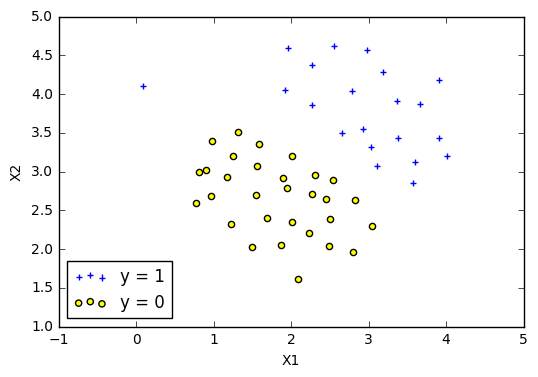

In [139]:
datamatrix = scipy.io.loadmat('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/ex6data1.mat')

X, y = datamatrix['X'], datamatrix['y']                 # training data

plotData(X,y)

Notice the outlier positive example (+) on the far left at about (0.1, 4.1). In this exercise, you will see how this outlier affects the SVM decision boundary. 

You will try using different values of the C paramter with SVMs. Informally, the C paramter is a positive value that controls the penalty for misclassified training examples. 

A large C parameter tells the svm to try to classify all the examples correctly. C plays a role similar to 1/lambda, where lambda is the regularization parameter that we used for logistic regression. 

First, train the SVM with C = 1. You should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left.

In [214]:
# trains an SVM classifier using SKlearn implementation

def plotSVM(svm, X, y):
    print svm
    sv = svm.support_vectors_

    # plotting code borrowed from scikit-learn's documentation
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    # Lastly, indicate which points were used as support vectors
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim((-.7, .4))
    plt.ylim((-.7,.7))

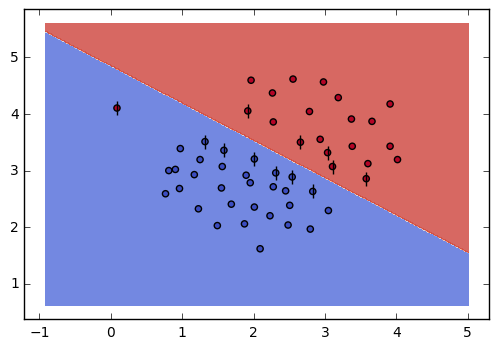

In [110]:
clf = svm.SVC(kernel = "linear", C = 1.0)
clf.fit(X,y)

plotSVM(clf, X, y)

When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data

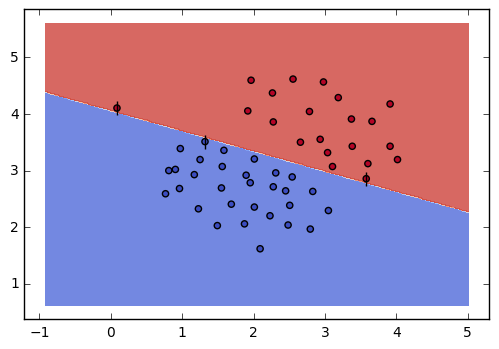

In [111]:
clf = svm.SVC(kernel = "linear", C = 100.0)
clf.fit(X,y)

plotSVM(clf, X, y)

### 1.2 SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In partiuclar, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable

#### 1.2.1 Gaussian Kernel

You can think of the Gaussian kernel as a similarity function that measures the 'distance' between a pair of examples. The Gaussian kernel is also parameterized by a bandwidth parameter sigma, which determines how fast the similarity metric decreases as the examples are futher apart.

In [131]:
from math import exp

def gaussianKernel(X1, X2, sigma):
    dist = exp(-np.sum((X1 - X2)**2)/(2.0*sigma**2))
    return dist

In [133]:
# we expect to see a value of 0.324652

x1 = np.array([[1], [2], [1]])
x2 = np.array([[0], [4], [-1]])
sigma = 2.0

gaussianKernel(x1, x2, sigma)

0.32465246735834974

#### 1.2.2 Example Dataset 2

Now, we will load and plot dataset 2. From the figure, you can observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.

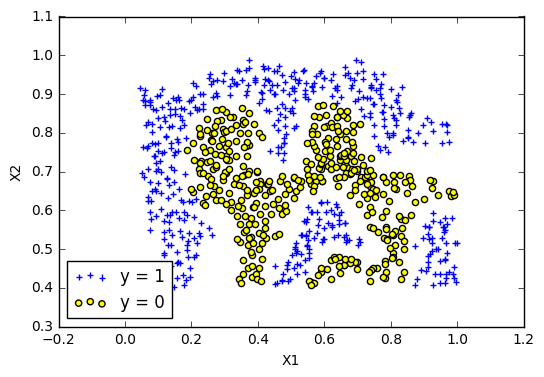

In [140]:
datamatrix = scipy.io.loadmat('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/ex6data2.mat')

X2, y2 = datamatrix['X'], datamatrix['y']                 # training data

plotData(X2,y2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


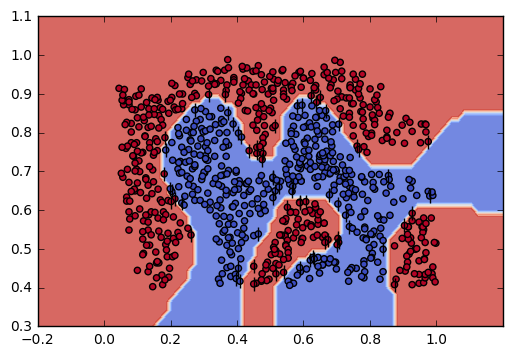

In [160]:
clf2 = svm.SVC(C=100, kernel='rbf', gamma=20)
clf2.fit(X2,y2)

plotSVM(clf2, X2, y2)

#### 1.2.3 Example Dataset 3

In dataset 3, you are given the variables X, y, Xval, yval. 
Train the SVM using the training set (X, y) and the parameters loaded from dataset3Params.

Task: use the cross validation set (Xval, yval) to determine the best C and sigma parameters to use. 

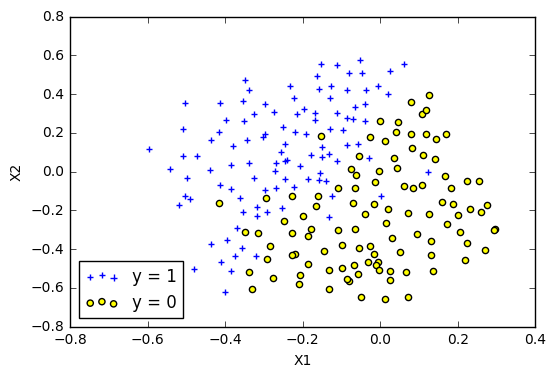

In [165]:
datamatrix = scipy.io.loadmat('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/ex6data3.mat')

X3, y3 = datamatrix['X'], datamatrix['y']                 # training data
X3val, y3val = datamatrix['Xval'], datamatrix['yval']
plotData(X3,y3)

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



def optimizeParams(Xtrain, ytrain, Xval, yval):

    C_vals = [0.01, 0.03 , 0.1, 0.3, 1, 3, 10, 30,50, 75, 100]
    sigma_vals = [0.01, 0.03, .1, .3, 1, 3, 10, 30]
    
    # try optimizing precison or recall scores:
    scores = ['precision', 'recall']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        parameters = {'C': C_vals, 'gamma': sigma_vals, 'kernel': ['rbf']}
        clf = GridSearchCV(svm.SVC(C=1), parameters, scoring = 'recall')
        clf.fit(Xtrain, ytrain.ravel())
       
        print("Best parameters set found on training set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on training set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full training set.")
        print("The scores are computed on the full cross validation set.")
        print()
        y_true, y_pred = yval, clf.predict(Xval)
        print(classification_report(y_true, y_pred))
        print()
    return clf.best_params_



In [230]:
best = optimizeParams(X3, y3, X3val, y3val)

# Tuning hyper-parameters for precision
()
Best parameters set found on training set:
()
{'kernel': 'rbf', 'C': 0.01, 'gamma': 0.01}
()
Grid scores on training set:
()
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.01}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.03}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.1}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.3}
0.963 (+/-0.105) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 1}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 3}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 10}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 30}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.01}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.03}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.1}
0.972 (+/-0.079) for {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.3}
0.934 (+/-0.095) for {'kernel': 'rbf', 'C': 0.03, 'gamma': 1}
0.88

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


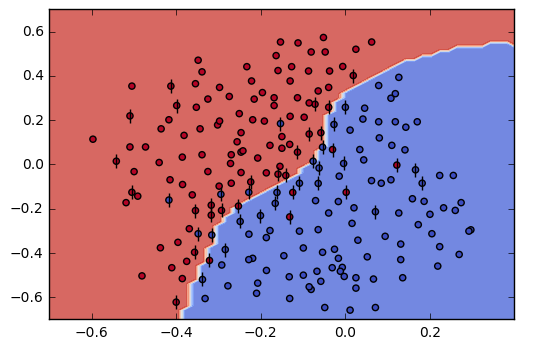

In [231]:
clf3 = svm.SVC(C=100, kernel='rbf', gamma=10)
clf3.fit(X3,y3)

plotSVM(clf3, X3, y3)

## 2. Spam Classification

In this part of the exercise, you will use SVMs to build your own spam filter. 

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector. 

The dataset included for this exercise is based on a subset of the SpamAssassin Public Corpus. For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

### 2.1 Preprocessing Emails

We will attempt to preprocess and normalize the emails in the following ways:
- Lower-casing: the entire email is converted to lower case
- Stripping HTML: all HTML tags are removed
- Normalizing URLs: all URLs are replaced with 'httpaddr'
- Normalizing Email Addresses: all emails are replaced with 'emailaddr'
- Normalizing Numbers: all numbers are replaced with 'number'
- Normalizing Dollars: all dollar signs are replaced with 'dollar'
- Word Stemming: words are reduced to their stemmed form
- Removal of non-words: non words and punctuation have been removed


In [511]:
def getVocabList():
    n = 1899
    fid = open('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/vocab.txt', 'r')
    
    vdict = {}
    for i in range(1,n+1):
        line = fid.readline().strip()
        w = line.split()
        vdict[w[0]] = w[1]  
        
    return vdict

In [512]:
vlist = getVocabList()

In [388]:
import re
def processEmail(emailtext):
    
    contents = emailtext.lower()                                       # lower case   
    contents = re.sub('<[^<>]+>', ' ', contents)                       # strip HTML
    contents = re.sub('[0-9]+', 'number', contents)                    # handle numbers
    contents = re.sub('(http|https)://[^\s]*', 'httpaddr', contents)   # handle URLs
    contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', contents)          # handle Email addresses
    contents = re.sub('[$]+', 'dollar', contents)                      # handle $ signs
    
    return contents

In [389]:
import nltk, nltk.stem.porter
def tokenizeEmail(processedtext):
    stemmer = nltk.stem.porter.PorterStemmer()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', processedtext)

    tokenlist = []
    for token in tokens:
        token = re.sub('[^a-zA-Z0-9]', '', token);   # remove non-alphanumerics
        stemmed = stemmer.stem( token )              # stem word
        if not len(token): continue                  # skip token if too short
            
        tokenlist.append(stemmed)
    return tokenlist

In [390]:
def addToList(email):
    processed = processEmail(email)
    tokenized = tokenizeEmail(processed)
    # look up each word in the dictionary and add to word_indices if found
    word_indices = []
    for word in tokenized:
        if word in vlist:
            word_indices.append(vlist[word])
    return word_indices

### 2.2 Extracting Features from Emails

You will now implement the feature extraction that converts each email into a vector in R^n. For this exercise, you will be using n = # of words in vocabulary list. Specifically, the feature x(i) for an email corresponds to whether the i-th word in the dictionary occurs in the email (either 0 or 1). 

In [419]:
def emailFeatures(email):
    n = len(vlist)
    word_indices = addToList(email)
    features = []
    for i in range(1, len(vlist)+1):
        if str(i) in word_indices:
            features.append(i)
        else:
            features.append(0)
            
    features = np.array(features)
    feats = (features >= 1) * 1
    return feats

In [427]:
# running code on the email sample should return a feature 
# vector of length 1899 with 45 non-zero entries

sample_email = open('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/emailSample1.txt', 'r')
email_contents = sample_email.read().replace('\n', '')
sample_features = emailFeatures(email_contents)
print 'Length of feature vector: ', len(sample_features), '\n', \
'Number of non-zero entries: ', sum(sample_features)

Length of feature vector:  1899 
Number of non-zero entries:  45


### 2.3 Training SVM for Spam Classification

The next step is to load a preprocessed training dataset that will be used to train an SVM classifier. spamTrain contains 4000 training examples of spand and non-spam email, while spamTest contains 1000 test examples.

Each original email was processed using the processEmail and emailFeatures functions and converted into an (1899 x 1) feature vector.

In [465]:
train = scipy.io.loadmat('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/spamTrain.mat')
test = scipy.io.loadmat('/Users/tess/Desktop/MachineLearning/machine-learning-ex6/ex6/spamTest.mat')

Xtrain, ytrain = train['X'], train['y']                 # training data
Xtest, ytest = test['Xtest'], test['ytest']             # testing data

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

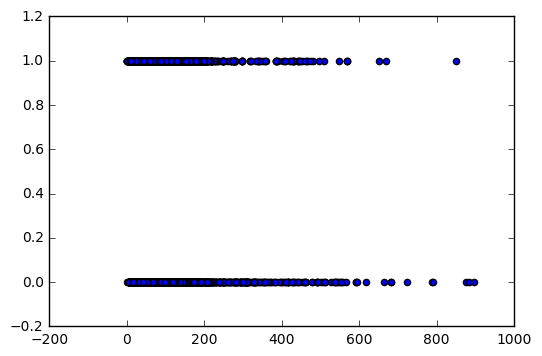

In [466]:
# are positive and negative examples linearly separable based on
# *how many* words they contain in the vlist?

out = np.sum(Xtrain, axis = 1)
plt.scatter(out, ytrain)

Next, try to train an SVM to classify emails as spam (y = 1) or non-spam(y = 0). The classifier should achieve a training accuracy of about ~99.8%  and a test accuracy of about 98.5%

In [463]:
# training svm with linear kernel
# (as directed in original octave code)

clfspam = svm.SVC(C=.1, kernel='linear')
clfspam.fit(Xtrain,ytrain)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [464]:
predict_train = clfspam.predict(Xtrain).reshape((ytrain.shape[0],1))
train_acc = 100. * float(sum(predict_train == ytrain))/ytrain.shape[0]
print 'Training accuracy = %0.2f%%' % train_acc

predict_test = clfspam.predict(Xtest).reshape((ytest.shape[0],1))
test_acc = 100. * float(sum(predict_test == ytest))/ytest.shape[0]
print 'Test set accuracy = %0.2f%%' % test_acc

Training accuracy = 99.83%
Test set accuracy = 98.90%


### 2.4 Top Predictors for Spam
To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. 

In [505]:
# sort the weights and obtain the vocabulary list
word_weights = clfspam.coef_
ww = []
for index,word in enumerate(word_weights[0]):
    ww.append([index+1, word])    
ww_sorted = sorted(ww, key=lambda x: x[1], reverse = True)

In [516]:
for i in range(15):
    print vlist[str(ww_sorted[i][0])]

our
click
remov
guarante
visit
basenumb
dollar
will
price
pleas
most
nbsp
lo
ga
hour
